### 8 -  Clustering - Credit Card Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [6]:
df['PURCHASES_CREDIT_LIMIT_RATIO'] = df['PURCHASES'] / df['CREDIT_LIMIT']
df['PAYMENTS_CREDIT_LIMIT_RATIO'] = df['PAYMENTS'] / df['CREDIT_LIMIT']
df['MINIMUM_PAYMENTS_CREDIT_LIMIT_RATIO'] = df['MINIMUM_PAYMENTS'] / df['CREDIT_LIMIT']
df['ONEOFF_PURCHASES_PURCHASES_RATIO'] = df['ONEOFF_PURCHASES'] / df['PURCHASES']
df['INSTALLMENTS_PURCHASES_PURCHASES_RATIO'] = df['INSTALLMENTS_PURCHASES'] / df['PURCHASES']


In [7]:
df['TOTAL_PURCHASES_FREQUENCY'] = df['PURCHASES_FREQUENCY'] + df['ONEOFF_PURCHASES_FREQUENCY'] + df['PURCHASES_INSTALLMENTS_FREQUENCY']
df['TOTAL_CASH_ADVANCE_FREQUENCY'] = df['CASH_ADVANCE_FREQUENCY'] + df['CASH_ADVANCE_TRX']


In [8]:
x=df[["BALANCE","PURCHASES","CREDIT_LIMIT"]]


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [11]:
clusters = kmeans.fit_predict(x)

In [12]:
df['cluster'] = clusters

In [13]:
df.cluster.value_counts()

cluster
1    5266
2    2520
3     577
0     558
4      29
Name: count, dtype: int64

In [14]:
 silhouette_score(x, clusters)


0.4622737084041015

Text(0, 0.5, 'Fiyat')

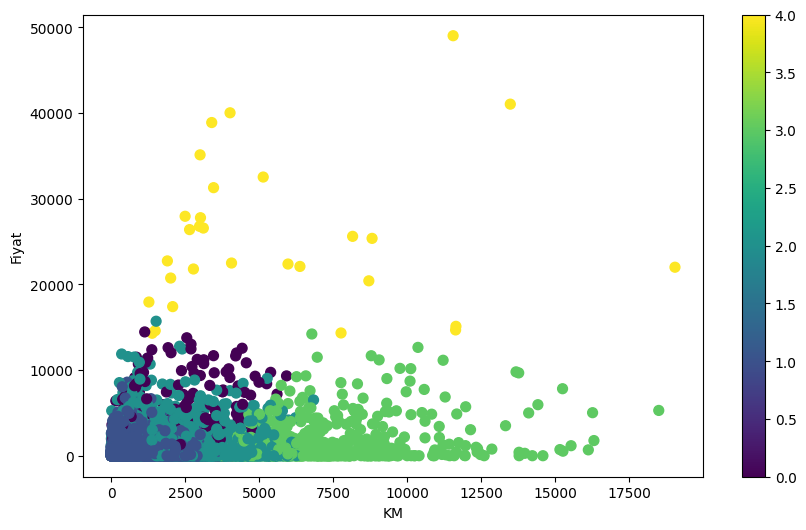

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x.BALANCE,x.PURCHASES, c=clusters, s=50, cmap='viridis')
plt.colorbar()
plt.xlabel('KM')
plt.ylabel('Fiyat')


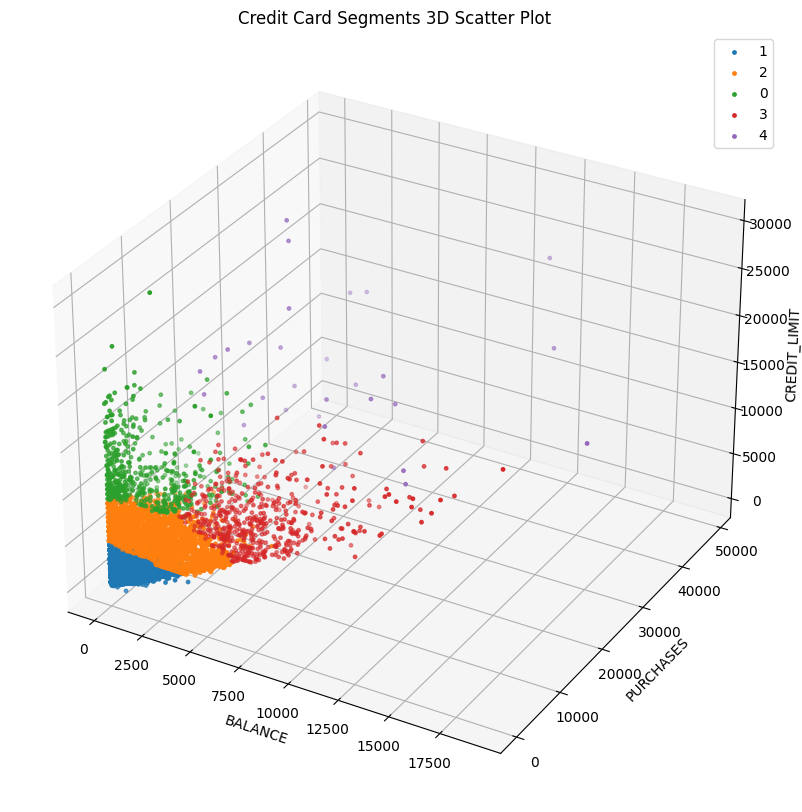

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Loop through each unique credit card segment
for i in df["cluster"].unique():
    clusters = df[df["cluster"] == i]
    ax.scatter(clusters['BALANCE'], 
               clusters['PURCHASES'], 
               clusters['CREDIT_LIMIT'], 
               label=str(i), s=6)

# Set axis labels
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CREDIT_LIMIT')

# Add a legend
ax.legend()

# Set the title of the plot
plt.title('Credit Card Segments 3D Scatter Plot')

# Show the plot
plt.show()

In [17]:
#save model to pickle
import pickle
pickle.dump(kmeans, open('Credit Card Clustering.h5', 'wb'))